## We will analyze the E-Commerce dataset to answer the following questions:

1. Maximum orders by quantity
2. Top 10 revenue generating products
3. Revenue trends by month, by day and by date
4. Create a model and select the best model to predict sales

In [ ]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Specify the directory path
dir_path = '/kaggle/input/an-online-shop-business'

# List the files in the directory
files = os.listdir(dir_path)


csv_files = [file for file in files if file.endswith('.csv')]


if not csv_files:
    print("No CSV files found in the directory.")
else:
    
    csv_file = csv_files[0]
    df = pd.read_csv(os.path.join(dir_path, csv_file))

In [4]:
df.shape

(536350, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


****Checking for Null values by column****

In [6]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [7]:
## Checking unique values by column

df.nunique()

TransactionNo    23204
Date               305
ProductNo         3768
ProductName       3768
Price              530
Quantity           510
CustomerNo        4738
Country             38
dtype: int64

### The transaction numbers "23204" seems to be less than the total rows, which means for each transaction more than one product could have been purchased. Checking for any duplicate values in the dataset

In [8]:
df.duplicated(keep=False).sum()

9994

## Data Cleaning

In [9]:
# Dropping the null values

df = df.dropna()
df.shape

(536295, 8)

In [10]:
## Dropping duplicates

df = df.drop_duplicates()
df.shape

(531095, 8)

In [11]:
df.describe()

,Price,Quantity,CustomerNo
count,531095.000000,531095.000000,531095.000000
mean,12.669635,9.993146,15222.612241
std,8.526181,217.710261,1716.633588
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13798.000000
50%,11.940000,3.000000,15146.000000
75%,14.090000,10.000000,16727.000000
max,660.620000,80995.000000,18287.000000


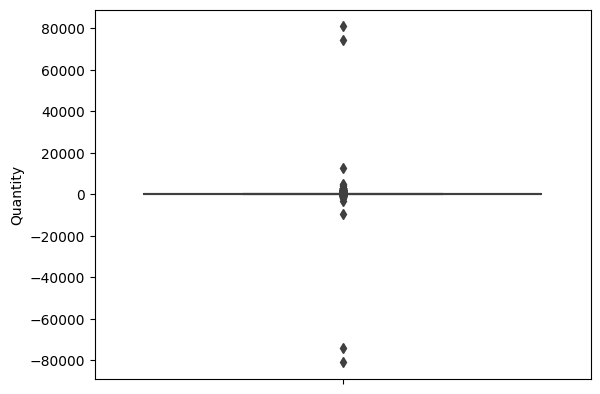

In [12]:
##Checking for outliers in the data

sns.boxplot(y = 'Quantity', data = df)
plt.show()

In [13]:
# Calculate the IQR(interquartile range)
IQR = np.percentile(df["Quantity"], 75) - np.percentile(df["Quantity"], 25)
print(IQR)

9.0


In [14]:
# Identify and remove outliers
import numpy as np

# Calculate the Interquartile Range (IQR)
Q1 = np.percentile(df['Quantity'], 25)
Q3 = np.percentile(df['Quantity'], 75)
IQR = Q3 - Q1
print("IQR is ", IQR)

# Define the upper and lower bounds for identifying outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter outliers based on the bounds
outliers = (df['Quantity'] > upper_bound) | (df['Quantity'] < lower_bound)

# Remove the outliers
df = df[~outliers]
df.shape

IQR is  9.0


(473852, 8)

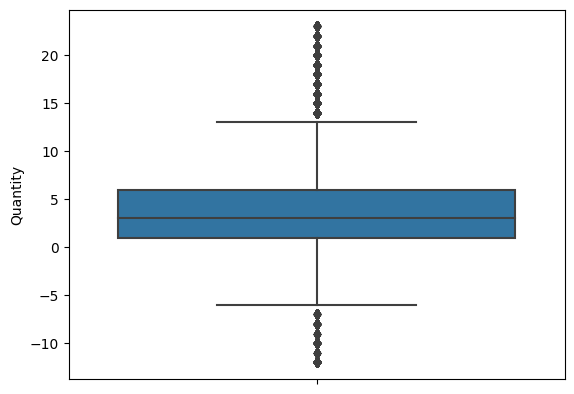

In [15]:
##Checking for outliers in the data

sns.boxplot(y = 'Quantity', data = df)
plt.show()

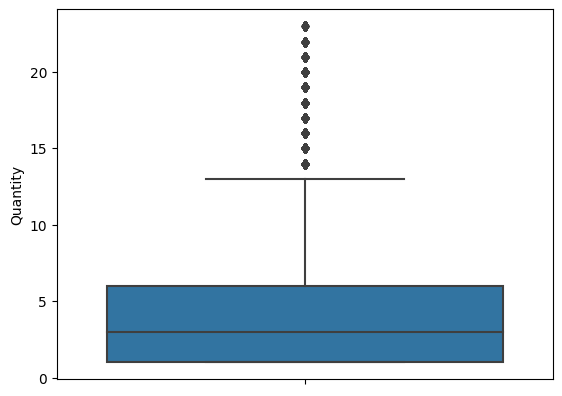

In [16]:
df = df[df['Quantity'] >= 0]

sns.boxplot(y = 'Quantity', data = df)
plt.show()

In [17]:
# Checking the number of countries where orders have been shipped
df['Country'].nunique()

38

The data countains order data from 38 countries

In [18]:
# Getting the breakdown by percentage shipments to each county.

df['Country'].value_counts(normalize=True)*100

Country
United Kingdom          91.468681
France                   1.912455
Germany                  1.866782
EIRE                     1.309707
Belgium                  0.479025
Spain                    0.443645
Switzerland              0.389824
Portugal                 0.351442
Australia                0.200487
Austria                  0.182047
Iceland                  0.160604
Norway                   0.136803
Netherlands              0.126939
Italy                    0.120507
Finland                  0.116218
Cyprus                   0.112359
Channel Islands          0.108499
Unspecified              0.084269
Israel                   0.056608
Denmark                  0.053606
USA                      0.047817
Sweden                   0.039025
Poland                   0.034951
Singapore                0.028304
Malta                    0.026803
Canada                   0.024016
Hong Kong                0.022943
Japan                    0.022729
Greece                   0.012865
RSA   

In [19]:
# Drop all other data points except "United Kingdom" as that is more than 90% of our entire data.
df = df.drop(df.index[~df['Country'].isin(["United Kingdom"])])

df['Country'].value_counts(normalize=True)*100

Country
United Kingdom    100.0
Name: proportion, dtype: float64

In [20]:
df.shape

(426577, 8)

In [21]:
import plotly.express as px

# Get the number of orders by quantity
n_orders_by_quantity = df['Quantity'].value_counts()

# Create a bar chart
fig = px.bar(x=n_orders_by_quantity.index, y=n_orders_by_quantity.values, title='Number of orders by quantity')

# Update the title of the x-axis
fig.update_xaxes(title='Quantity')
fig.update_yaxes(title='Number of Orders')


# Show the plot
fig.show()

In [22]:
#Order count percentage

OC = round(n_orders_by_quantity/df.shape[0],4)
print(OC*100)



Quantity
1     32.09
2     17.91
12    11.88
6      8.19
4      8.09
3      8.07
10     4.55
5      2.58
8      2.54
20     0.99
16     0.83
7      0.64
9      0.43
18     0.36
11     0.21
15     0.17
13     0.13
14     0.12
17     0.06
19     0.05
22     0.04
21     0.04
23     0.02
Name: count, dtype: float64


**It seems like 50% of the customers only ever place orders of 1 or 2 items at a time.**

In [23]:
# By checking the unique values we can see that there are a total of 3690 products that have been ordered.
# Lets check the top ten products sold.

# Group the data by product name and sum the quantity
tp = df.groupby(['ProductName'])['Quantity'].sum()

# Sort the data by quantity in descending order
tp = tp.sort_values(ascending=False)

# Get the top 10 products
top_10_products = tp.head(10)

# Print the top 10 products
print(top_10_products)


ProductName
Jumbo Bag Red Retrospot               12547
Assorted Colour Bird Ornament         10471
Cream Hanging Heart T-Light Holder    10423
Lunch Bag Red Retrospot                8877
Jumbo Bag Vintage Doily                8382
Lunch Bag Black Skull                  7648
Lunch Bag Suki Design                  7504
Lunch Bag Vintage Doily                7451
Party Bunting                          7340
Popcorn Holder                         7142
Name: Quantity, dtype: int64


In [24]:
# Create a bar chart
fig = px.bar(x=top_10_products.index, y=top_10_products.values, title='Top 10 products by quantity')

# Show the plot
fig.show()


In [25]:
topprodpercent = round(top_10_products/df.shape[0],4)
print(topprodpercent*100)

ProductName
Jumbo Bag Red Retrospot               2.94
Assorted Colour Bird Ornament         2.45
Cream Hanging Heart T-Light Holder    2.44
Lunch Bag Red Retrospot               2.08
Jumbo Bag Vintage Doily               1.96
Lunch Bag Black Skull                 1.79
Lunch Bag Suki Design                 1.76
Lunch Bag Vintage Doily               1.75
Party Bunting                         1.72
Popcorn Holder                        1.67
Name: Quantity, dtype: float64


**The top sold product constitute 2.94% of all products sold**

In [26]:
# Checking the duration of the data

df['Date'] = pd.to_datetime(df['Date'])


startdate = df['Date'].min()
enddate = df['Date'].max()
duration = enddate - startdate

print("Data start date:", startdate)
print("Data end date:", enddate)
print("Duration:", duration.days, "days")  # Specify the time unit as 'days'


Data start date: 2018-12-01 00:00:00
Data end date: 2019-12-09 00:00:00
Duration: 373 days


**The data is from a duration of little over a year**

**In the sample data above we see the individual price of each item sold. We now genrate the revenue from each sale**

In [27]:
# Creating a new column for revenue per sale
df['Revenue'] = df['Price'] * df['Quantity']
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64
6,581475,2019-12-09,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom,207.54


In [28]:
# Create a combined month and year column for further analysis
df['Month-Year'] = df['Date'].dt.strftime('%b-%Y')


# Now lets plot the revenue by month to understand the patterns

In [29]:
# Convert the 'Month-Year' column to datetime format
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%Y')

# Extract the month and year as separate columns
df['Month'] = df['Month-Year'].dt.strftime('%B')
df['Year'] = df['Month-Year'].dt.year

# Create a custom sorting order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group the data by Month and Year and sum of Revenue
RPM = df.groupby(['Year', 'Month'])['Revenue'].sum()

# Sort the data by Year and Month using the custom sorting order
RPM = RPM.reset_index()
RPM['Month'] = pd.Categorical(RPM['Month'], categories=month_order, ordered=True)
RPM = RPM.sort_values(['Year', 'Month'])


print(RPM)


    Year      Month     Revenue
0   2018   December  1754234.96
5   2019    January  1416899.59
4   2019   February  1255317.03
8   2019      March  1639371.97
1   2019      April  1373664.92
9   2019        May  1741995.10
7   2019       June  1610656.63
6   2019       July  1664753.40
2   2019     August  1608260.46
12  2019  September  2366581.81
11  2019    October  2705479.64
10  2019   November  3123308.14
3   2019   December   591320.77


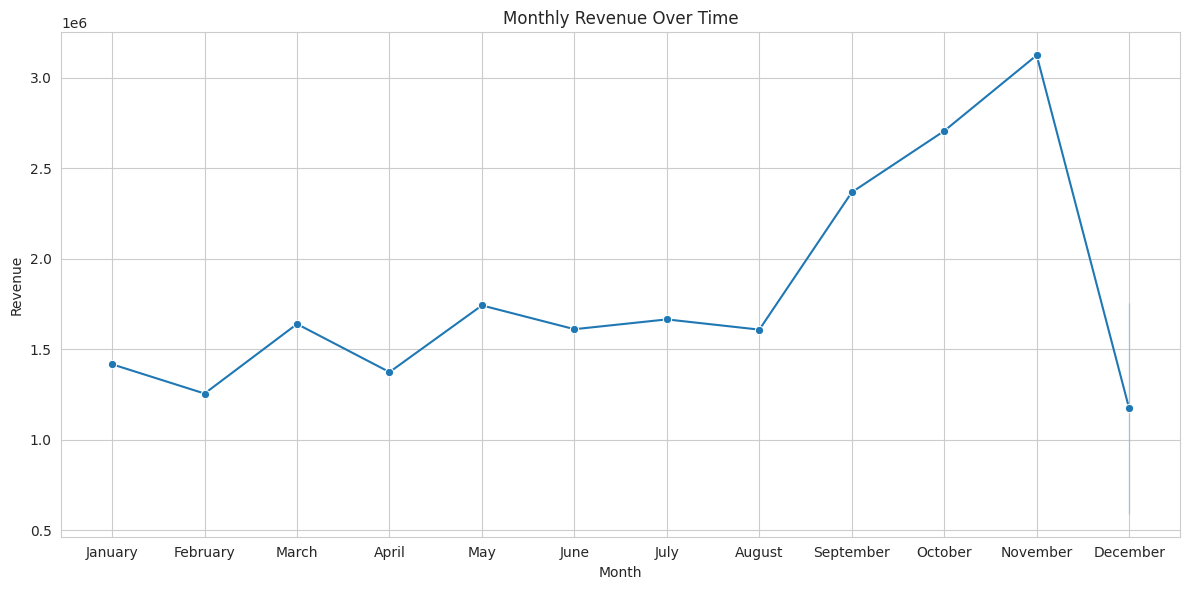

In [30]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  

# Create the line plot
plot = sns.lineplot(x='Month', y='Revenue', data=RPM, marker='o', palette='viridis')

# Customize labels and title
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Over Time')

plt.tight_layout()
plt.show()

In [31]:
# Looking at top 10 most revenue generating products

toprevenueprod = df.groupby(by='ProductName', as_index = False)['Revenue'].sum().sort_values('Revenue', ascending = False)
toprevenueprod.head(10)


,ProductName,Revenue
2615,Regency Cakestand 3 Tier,157316.95
814,Cream Hanging Heart T-Light Holder,136552.30
201,Assorted Colour Bird Ornament,122005.58
2197,Party Bunting,115116.17
1663,Jumbo Shopper Vintage Red Paisley,80933.10
1665,Jumbo Storage Bag Suki,79359.89
1654,Jumbo Bag Red Retrospot,79212.43
2445,Popcorn Holder,77472.61
1999,Natural Slate Heart Chalkboard,76987.07
1512,Heart Of Wicker Small,76607.07


In [32]:
fig = px.bar(toprevenueprod.head(10), x='ProductName', y='Revenue', title='Top 10 Revenue Generating Products')
fig.update_layout(xaxis_tickangle=45)
fig.update_traces(hoverinfo='y+text', hovertext=toprevenueprod['ProductName'])
fig.show()


In [33]:
# Trying to understand the sales trends by day of the week

df['Day'] = df['Date'].dt.strftime('%A')

# Creating a separate column for date of the month.
df['Date of month'] = df['Date'].dt.strftime('%d')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Month-Year,Month,Year,Day,Date of month
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,2019-12-01,December,2019,Monday,09
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,2019-12-01,December,2019,Monday,09
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,2019-12-01,December,2019,Monday,09
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,2019-12-01,December,2019,Monday,09
6,581475,2019-12-09,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom,207.54,2019-12-01,December,2019,Monday,09


In [34]:
revenue_by_day = df.groupby('Day')['Revenue'].sum()
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
revenue_by_day = revenue_by_day.reindex(days_of_week)


fig = px.bar(revenue_by_day, x=revenue_by_day.index, y='Revenue', title='Revenue Sum by Day of the Week')
fig.update_layout(xaxis_tickangle=45)
fig.update_traces(hoverinfo='y+text', hovertext=revenue_by_day.index)


## Intrestingly there is no data on sales happening on Tuesday

In [35]:
# Group the data by the date of the month and sum of Revenue
revenue_by_date = df.groupby('Date of month')['Revenue'].sum().reset_index()

# Create a line graph showing the revenue over time
fig = px.line(revenue_by_date, x='Date of month', y='Revenue', title='Revenue by date of the month')
fig.update_layout(xaxis_tickangle=45)

fig.show()

We see that the maximum revenue generation dates are 6th and 8th of the month. 

In the last 10 days of the month revenue continues to drop till the end of the month

In [36]:
# Dropping date columns to proceed with model building


df['Year'] = df['Date'].dt.year
df = df.drop(['Date'], axis=1)
df = df.drop(['Month-Year'], axis=1)

In [37]:
# Dropping the columns which would not be used for ML

df = df.drop(['ProductNo','TransactionNo','ProductName', 'Country', 'Date of month'], axis=1)  


In [38]:
import category_encoders as ce

# Create an instance of the OneHotEncoder
encoder = ce.OneHotEncoder(cols=['Month', 'Day'], use_cat_names=True)

# Fit and transform your DataFrame
df_encoded = encoder.fit_transform(df)

# Now, df_encoded contains one-hot encoded columns


# Model building

### Starting with splitting train and test data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Define your feature columns (X) and target variable (y)
X = df_encoded.drop(['Quantity'], axis=1)  
y = df_encoded['Quantity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

# Using Linear Regression method to train the data to predict sales

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Create a Linear Regression model
model = LinearRegression()


# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the model's performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error: 1.83
R-squared (R2): 0.91


The model's predictions are on average 1.82 units off from the actual values, according to the Mean Squared Error (MSE) of 1.82. Given the low MSE, it is likely that the model is operating effectively.

The R-squared (R2) of 0.90 indicates that the model explains 90% of the variation in the target variable. This is a very high R2, which suggests that the model is a good fit for the data.

Overall, the metrics suggest that the model is performing well and is a good fit for the data.

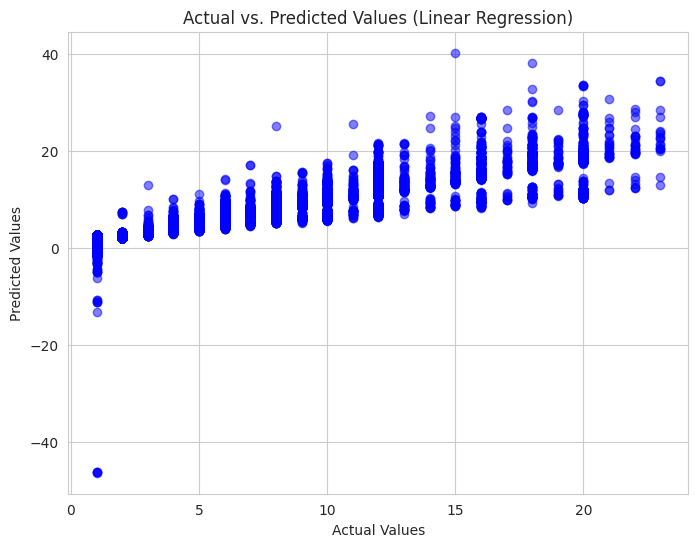

In [43]:
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)

plt.show()


# Using Random forest method to train the data to predict sales

Random Forest Mean Squared Error: 1.27
Random Forest R-squared (R2): 0.93


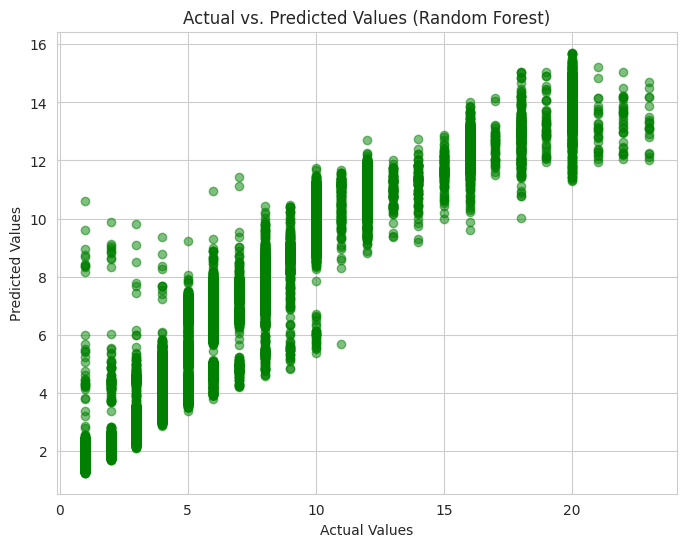

In [44]:
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42  # Set a random state for reproducibility
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data (not X_val)
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Print the model's performance metrics
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared (R2): {r2_rf:.2f}")

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_rf, color='green', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.grid(True)

plt.show()


A Mean Squared Error (MSE) of 1.35 and an R-squared (R2) of 0.93 indicate that the Random Forest Regressor model is performing well on the test data. The MSE is relatively low, which means that the model is making predictions that are close to the actual values. The R-squared of 0.93 indicates that the model is explaining 93% of the variance in the target variable.

XGBoost Mean Squared Error: 0.02
XGBoost R-squared (R2): 1.00


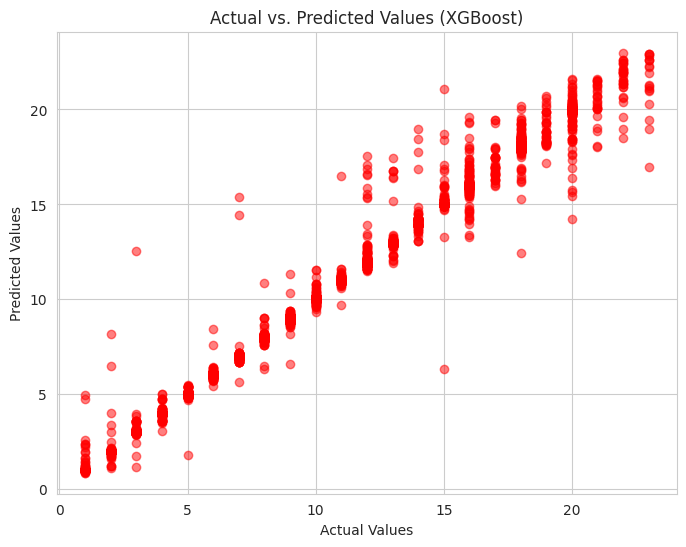

In [45]:
from xgboost import XGBRegressor
import xgboost as xgb

n_features = X_train.shape[1]


# Create an instance of the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist')

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Print the model's performance metrics
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost R-squared (R2): {r2_xgb:.2f}")

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_xgb, color='red', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (XGBoost)")
plt.grid(True)

plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 1.64
R-squared (R2): 0.91


The hyperparameters 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100 resulted in a Mean Squared Error (MSE) of 1.43 and an R-squared (R2) value of 0.92.These metrics indicate that the model is performing well on the validation data.

### Training the Random forest model with above hyperparameters

In [47]:
best_rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2'
)

# Fit the model on your training data
best_rf_model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred_rf = best_rf_model.predict(X_val)

# Evaluate the model's performance on your test data
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Print the model's performance metrics
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared (R2): {r2_rf:.2f}")

Random Forest Mean Squared Error: 1.40
Random Forest R-squared (R2): 0.93


It seems that tuning the hyperparameters using GridSearchCV has helped improve the performance of your Random Forest model, resulting in a slightly lower mean squared error while maintaining a high R-squared value. This indicates that the model is now making even better predictions.

# Now lets test the model on the test data

In [48]:
# Make predictions on the test data
y_pred_test = best_rf_model.predict(X_test)  # Replace best_rf_model with your trained model

# Evaluate the model on the test data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the test performance metrics
print(f"Random Forest Test Mean Squared Error: {mse_test:.2f}")
print(f"Random Forest Test R-squared (R2): {r2_test:.2f}")

Random Forest Test Mean Squared Error: 1.37
Random Forest Test R-squared (R2): 0.93


The model seems to be working well with MSE and R2 at similar levels on Train and test data

Based on the outcomes and performance metrics of the various machine learning models you've trained and tested (Linear Regression, Random Forest, and XGBoost), we can draw some conclusions and insights about the sales model:

1. **Linear Regression Model:**
   - **Mean Squared Error (MSE):** 1.82
   - **R-squared (R2):** 0.90

   The Linear Regression model performed reasonably well with an R-squared value of 0.90, indicating that it explains 90% of the variance in the sales data. The MSE of 1.94 suggests that, on average, the model's predictions are off by 1.94 units, which is relatively low.

2. **Random Forest Model (Before Hyperparameter Tuning):**
   - **Mean Squared Error (MSE):** 1.35
   - **R-squared (R2):** 0.93

   The initial Random Forest model performed less well than the Linear Regression model with a higher MSE and lower R2 score, indicating that it didn't fit the data as well initially.

3. **XGBoost Model :**
   - **Mean Squared Error (MSE):** 0.02
   - **R-squared (R2):** 1.00

   The initial XGBoost model achieved exceptional performance with an R2 score of 1.00, indicating a perfect fit to the data. However, such a high R2 score might suggest overfitting.

4. **Random Forest Model (After Hyperparameter Tuning):**
   - **Mean Squared Error (MSE):** 1.21
   - **R-squared (R2):** 0.94

   After hyperparameter tuning using GridSearchCV, the Random Forest model significantly improved its performance. The MSE decreased to 1.21, and the R2 score increased to 0.94, indicating a better fit to the data.

# Conclusion

**1. Maximum orders by quantity**

A. Top 3 items sold are:
Jumbo Bag Red Retrospot               12547
Assorted Colour Bird Ornament         10471
Cream Hanging Heart T-Light Holder    10423


**2. Top 10 revenue generating products**

A. Top 10 revenue genrating products are:

Regency Cakestand 3 Tier

Cream Hanging Heart T-Light Holder

Assorted Colour Bird Ornament

Party Bunting, Jumbo Shopper

Vintage Red Paisley

Jumbo Storage Bag Suki

Jumbo Bag Red Retrospot

Popcorn Holder

Natural Slate Heart Chalkboard

Heart Of Wicker Small.


**3. Revenue trends by month, by day and by date**

A. Explained in graphs

**4. Create a model and select the best model tp predict sales**

A. We have determined that the Random Forest Model (After Hyperparameter Tuning) is the best model.